# Gradient Boosting Machines For Enhancer Activity Prediction


**Authorship:**
Adam Klie, *09/26/2021*
***
**Description:**
Notebook to train preliminary Gradient Boosting Machine classifiers for predicting enhancer activity
***
**TODOs:**
 - <font color='green'> Done TODO </font>
 - <font color='orange'> WIP TODO </font>
 - <font color='red'> Queued TODO </font>
***

In [1]:
# Classics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading webpages
from IPython.display import IFrame

import pickle

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [2]:
import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
import project_utils

# Define parameters of the notebook

In [6]:
DATASET = "2021-OLS-Library"  # Which dataset to look at
FEATURES = "mixed-3.0"  # What features to use to train the model
LABELS = "binary"
PREPROCESS = "0.09-0.4"  # Preprocessing steps, separated by "-"
TRAIN = False
SPLIT = 0.9
SUBSET = False
HYPERPARAM = "baseline"

# Load data

In [4]:
X_train = np.load('../data/{0}/{1}/{2}_X-train-{3}_{4}.npy'.format(DATASET.replace("-", "_"), FEATURES.replace("-", "_"), PREPROCESS, SPLIT, FEATURES))
X_test = np.load('../data/{0}/{1}/{2}_X-test-{3}_{4}.npy'.format(DATASET.replace("-", "_"), FEATURES.replace("-", "_"), PREPROCESS, round(1-SPLIT, 1), FEATURES))
y_train = np.loadtxt('../data/{0}/{1}/{2}_y-train-{3}_{1}.txt'.format(DATASET.replace("-", "_"), LABELS, PREPROCESS, SPLIT), dtype=int)
y_test = np.loadtxt('../data/{0}/{1}/{2}_y-test-{3}_{1}.txt'.format(DATASET.replace("-", "_"), LABELS, PREPROCESS, round(1-SPLIT, 1)), dtype=int)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((177793, 21), (177793,), (19755, 21), (19755,))

# Train and test a gradient boosting classifier

## **Gradient Boosting training**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

#### <u> **Train new model from scratch using out-of-box or hand-crafted hyperparams** </u> 

In [9]:
if TRAIN == True and HYPERPARAM == "baseline":
    clf = GradientBoostingClassifier(n_estimators=1000, random_state=13, verbose=1)
    print("Training new GBM with the following params: {}".format(clf.get_params()))
    clf.fit(X_train, y_train)

Training new GBM with the following params: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'random_state': 13, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}
      Iter       Train Loss   Remaining Time 
         1           1.3701            4.18m
         2           1.3586            4.01m
         3           1.3503            3.93m
         4           1.3416            3.89m
         5           1.3346            3.86m
         6           1.3290            3.87m
         7           1.3229            3.85m
         8           1.3183            3.85m
         9           1.3143            3.84m
        10           1.3097          

#### <u> **Train a new model using Optuna identified hyperparameters** </u>
TODO

#### <u> **Train new model using random search cross validation** </u> 
TODO

#### <u> **Get hyperpameters of model** </u>

In [42]:
if TRAIN == True:
    file = "{0}_{1}_GBM-clf_{2}.params.csv".format(PREPROCESS, FEATURES, HYPERPARAM)
    print("Saving hyperparams to {}".format(file))
    pd.DataFrame(pd.Series(clf.get_params())).T.to_csv(file, index=False)

Saving hyperparams to 0.09-0.4_mixed-3.0_GBM-clf_baseline.params.csv


#### <u> **Load previously trained model** </u>

In [7]:
if TRAIN == False:
    file = '{}_{}_GBM-clf_{}.pickle'.format(PREPROCESS, FEATURES, HYPERPARAM)
    print("Loading model from {}".format(file))
    clf = pickle.load(open(file, 'rb'))

Loading model from 0.09-0.4_mixed-3.0_GBM-clf_baseline.pickle


## **Gradient Boosting testing**

In [8]:
X_test = np.load("../data/2010_Khoueiry_CellPress/mixed_3.0/0.09-0.4_0.9-split_X-test_mixed-3.0.npy")

In [13]:
y_test = np.loadtxt("../data/2010_Khoueiry_CellPress/binary/y_binary.txt", dtype=int)
id_test = np.loadtxt("../data/2010_Khoueiry_CellPress/id/id.txt", dtype=str)
valid_idx = np.loadtxt("../data/2010_Khoueiry_CellPress/mixed_1.0/valid_id.txt", dtype=str)

In [18]:
y_test = pd.Series(index=id_test, data=y_test, name="FXN_LABEL").loc[valid_idx].values

In [19]:
y_test, y_test_preds

array([1, 0, 0, 1, 0, 0])

In [10]:
X_test.shape

(6, 21)

In [11]:
y_test_preds = clf.predict(X_test)

array([1, 0, 1, 0, 0, 1])

In [ ]:
X_test = np.load('../data/{0}/{1}/{2}_X-test-{3}_{4}.npy'.format(DATASET.replace("-", "_"), FEATURES.replace("-", "_"), PR

In [10]:
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

In [11]:
y_train_probs = clf.predict_proba(X_train)[:, 1]
y_test_probs = clf.predict_proba(X_test)[:, 1]

In [12]:
np.unique(y_train_preds, return_counts=True), np.unique(y_test_preds, return_counts=True)

((array([0, 1]), array([95858, 81965])),
 (array([0, 1]), array([10818,  8941])))

Generating confusion matrix
Calculating classification metrics
Metric	Train	Test
Accuracy	0.7216	0.7174
Precision	0.7156	0.7112
Recall	0.6913	0.6794
F0.1-Score	0.7153	0.7109
F0.5-Score	0.7106	0.7046
F1-Score	0.7032	0.6949
F2-Score	0.6960	0.6855
F10-Score	0.6915	0.6797
Plotting PR Curve
Plotting ROC Curve
Generating report


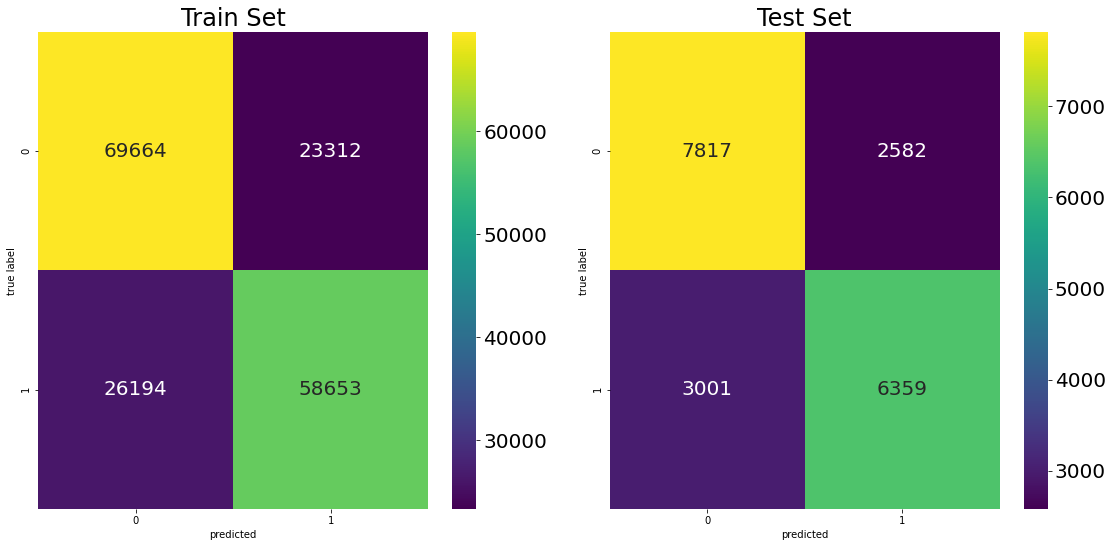

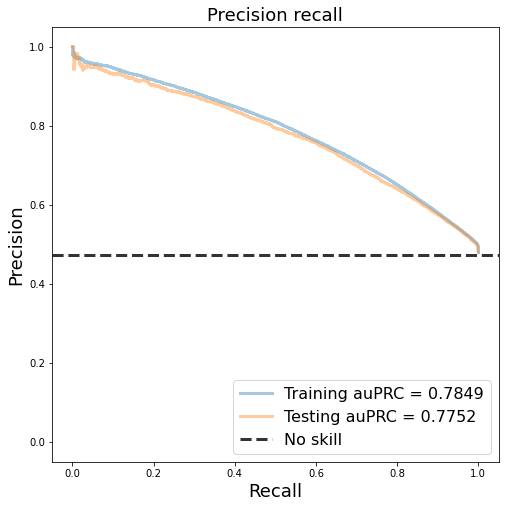

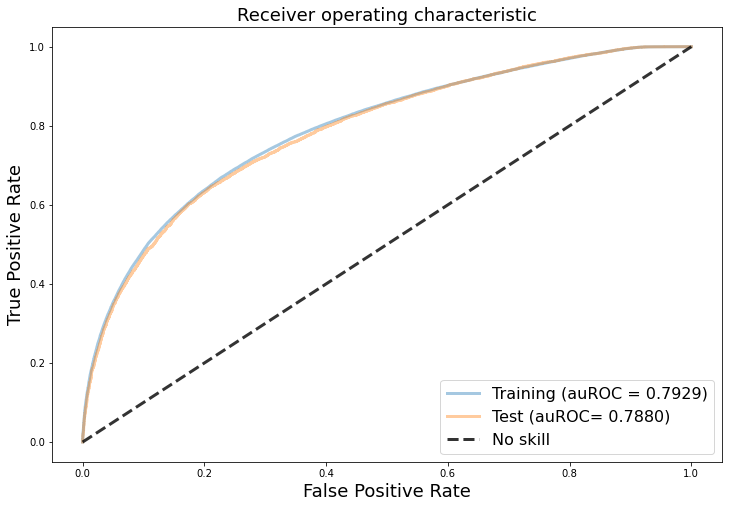

In [13]:
project_utils.classification_report(filename="{}_{}_{}_GBM-Classificaton-Report.md".format(PREPROCESS, FEATURES, HYPERPARAM),
                                    md_title="{}_{}_{}_GBM-Classificaton-Report".format(PREPROCESS, FEATURES, HYPERPARAM),
                                    clf=clf, train_X=X_train, test_X=X_test, train_y=y_train, test_y=y_test)
    

In [14]:
from sklearn.inspection import permutation_importance

In [16]:
file = "../data/{0}/{1}/{2}_header.txt".format(DATASET.replace("-", "_"), FEATURES.replace("-", "_"), FEATURES)
with open(file, "r") as f:
    features = [line.rstrip() for line in f.readlines()]

In [18]:
import time
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=12, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features)


Elapsed time to compute the importances: 57.232 seconds


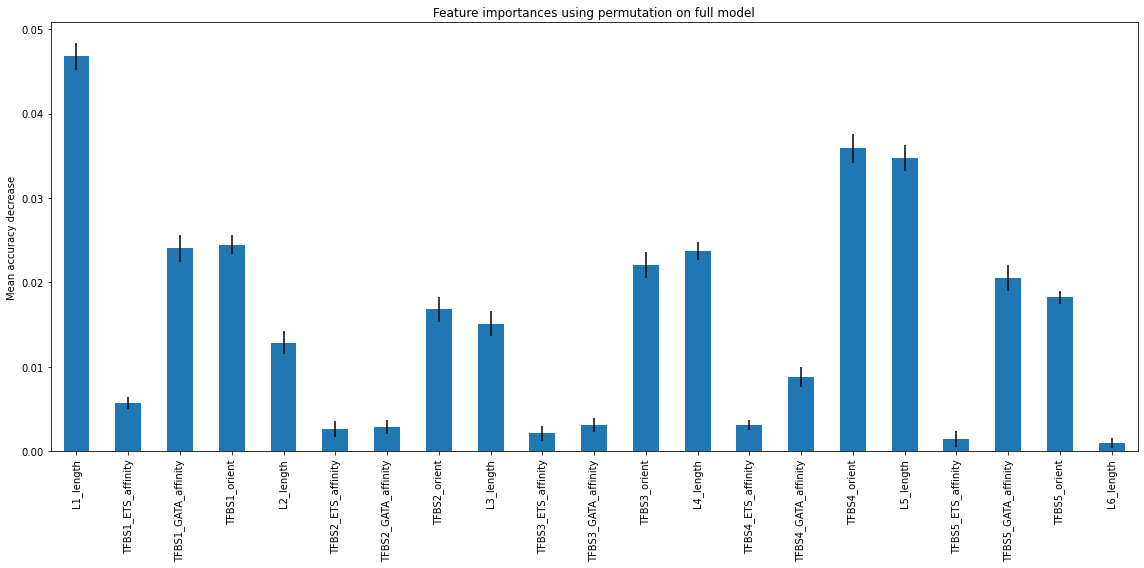

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Save the classifier

In [48]:
file = '{0}_{1}_GBM-clf_{2}.pickle'.format(PREPROCESS, FEATURES, HYPERPARAM)
pickle.dump(clf, open(file, 'wb'))

In [49]:
test_load = pickle.load(open(file, 'rb'))
np.unique(test_load.predict(X_test), return_counts=True)

(array([0, 1]), array([10818,  8941]))

# Scratch

## Old figure code (pre-report generation)

### <u>**Confusion matrices** </u>

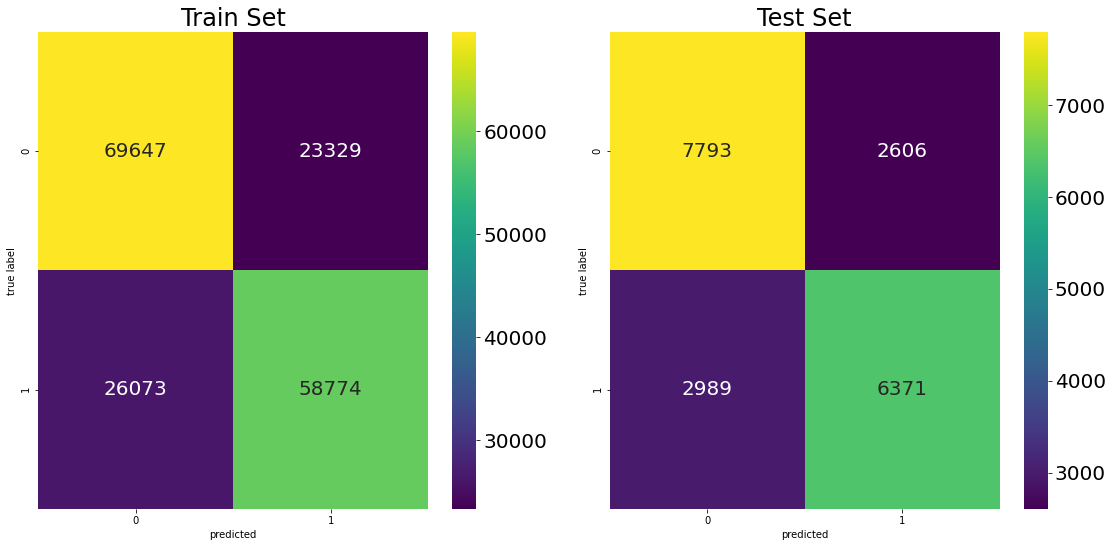

In [18]:
project_utils.train_test_confusion_matrix(train_y=y_train, 
                                          train_y_preds=y_train_preds, 
                                          test_y=y_test, 
                                          test_y_preds=y_test_preds, savefile="tmp.confusion.png")

### <u> **Classification Metrics** </u>

In [19]:
clf_metrics = project_utils.train_test_metrics(train_y=y_train, 
                                  train_y_preds=y_train_preds, 
                                  test_y=y_test, 
                                  test_y_preds=y_test_preds)

Metric	Train	Test
Accuracy	0.7222	0.7168
Precision	0.7159	0.7097
Recall	0.6927	0.6807
F0.1-Score	0.7156	0.7094
F0.5-Score	0.7111	0.7037
F1-Score	0.7041	0.6949
F2-Score	0.6972	0.6863
F10-Score	0.6929	0.6809


### <u> **Precision-recall** </u>

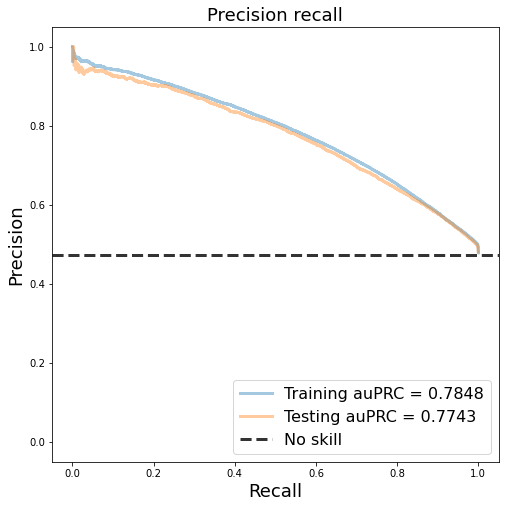

In [20]:
project_utils.train_test_pr_curve(train_y=y_train, 
                                  train_y_probs=y_train_probs, 
                                  test_y=y_test, 
                                  test_y_probs=y_test_probs,
                                   savefile="tmp.pr_curve.png")

### <u> **Reciever operating characteristic** </u>

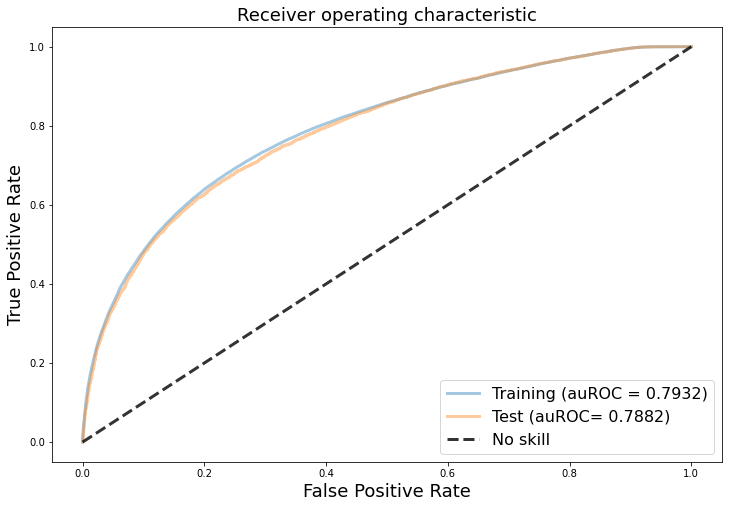

In [21]:
project_utils.train_test_roc_curve(train_y=y_train, 
                                   train_y_probs=y_train_probs, 
                                   test_y=y_test, 
                                   test_y_probs=y_test_probs,
                                   savefile="tmp.roc_curve.png")

## Report generation testing

In [ ]:
from mdutils.mdutils import MdUtils
from mdutils import Html

In [103]:
mdFile = MdUtils(file_name='Example_Markdown', title='GBM Classification Report')

mdFile.new_header(level=1, title='Confusion Matrices')
mdFile.new_line(mdFile.new_inline_image(text="confusion_matrices", path="tmp.confusion.png"))
mdFile.new_line()

mdFile.new_header(level=1, title='Classification Metrics')
mdFile.new_table(columns=3, rows=9, text=clf_metrics, text_align='center')

mdFile.new_header(level=1, title='Precision-Recall Curve')
mdFile.new_line(mdFile.new_inline_image(text="pr_curve", path="tmp.pr_curve.png"))
mdFile.new_line()

mdFile.new_header(level=1, title='Reciever Operator Characteristic')
mdFile.new_line(mdFile.new_inline_image(text="roc_curve", path="tmp.roc_curve.png"))
mdFile.new_line()

mdFile.new_table_of_contents(table_title='Contents', depth=2)

mdFile.create_md_file()

# References